## Create dummy dataset

In [1]:
import os
import pandas as pd

In [2]:
data = {
    "name": ["Alice", "Bob", "Charlie", "David", "Eve"],
    "age": [25, 30, 35, 40, 28],
    "city": ["Delhi", "Mumbai", "Kolkata", "Chennai", "Bangalore"]
}

In [3]:
df = pd.DataFrame(data)

In [4]:
df

,name,age,city
0,Alice,25,Delhi
1,Bob,30,Mumbai
2,Charlie,35,Kolkata
3,David,40,Chennai
4,Eve,28,Bangalore


In [5]:
df.to_csv("dummy_dataset.csv")

## Login to hugging face via api

In [6]:
import os
from dotenv import load_dotenv
from huggingface_hub import HfApi

In [7]:
load_dotenv()
HF_TOKEN_WRITE = os.getenv("HF_TOKEN_WRITE")
api = HfApi(token=HF_TOKEN_WRITE)
user = api.whoami()

print(user['name'])

abhishekdey


In [9]:
print(api.whoami()['name'])

abhishekdey


### Create a new dataset repository

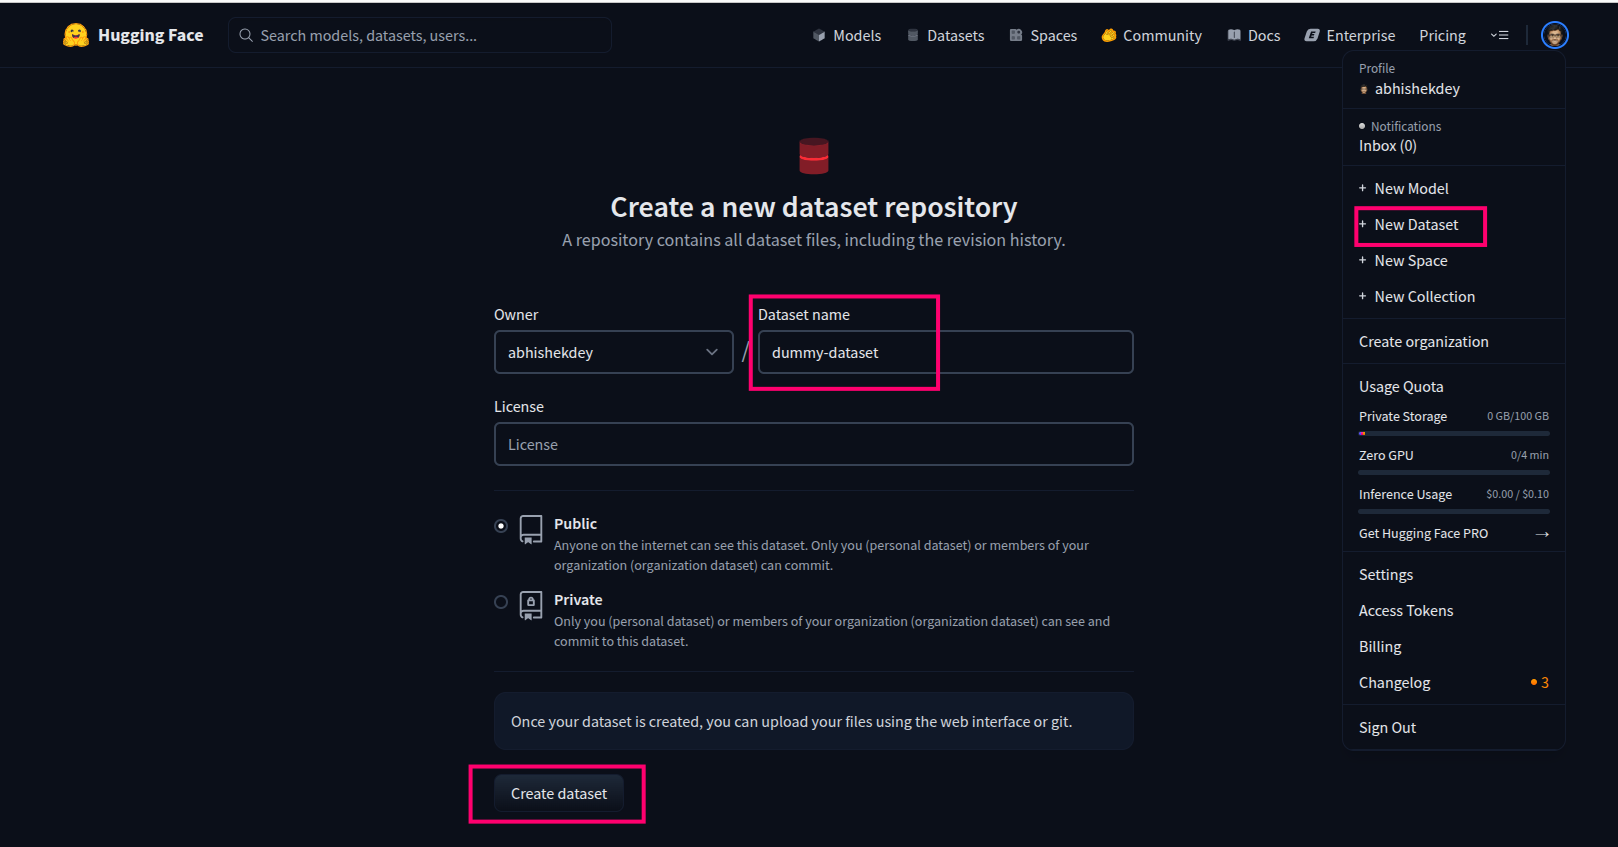

In [22]:
from IPython.display import Image, display

# Local file
display(Image(filename="images/1.png"))

### Upload the csv in the dataset repo

In [10]:
from huggingface_hub import HfApi
api = HfApi(token=HF_TOKEN_WRITE)
api.upload_file(
    path_or_fileobj="dummy_dataset.csv",
    path_in_repo="dummy_dataset.csv",
    repo_id="abhishekdey/dummy-dataset",
    repo_type="dataset",
)

CommitInfo(commit_url='https://huggingface.co/datasets/abhishekdey/dummy-dataset/commit/2f9f93a60fe853ce8655e4121f58995ddef41c7c', commit_message='Upload dummy_dataset.csv with huggingface_hub', commit_description='', oid='2f9f93a60fe853ce8655e4121f58995ddef41c7c', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/abhishekdey/dummy-dataset', endpoint='https://huggingface.co', repo_type='dataset', repo_id='abhishekdey/dummy-dataset'), pr_revision=None, pr_num=None)

### Download the dataset

In [16]:
from datasets import load_dataset

dataset = load_dataset("abhishekdey/dummy-dataset",token=HF_TOKEN_WRITE)

dummy_dataset.csv:   0%|          | 0.00/107 [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5 [00:00<?, ? examples/s]

In [17]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'name', 'age', 'city'],
        num_rows: 5
    })
})


In [19]:
train_data=dataset["train"]

In [20]:
train_data[:5]

{'Unnamed: 0': [0, 1, 2, 3, 4],
 'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
 'age': [25, 30, 35, 40, 28],
 'city': ['Delhi', 'Mumbai', 'Kolkata', 'Chennai', 'Bangalore']}

## Dataset Pre-processing

In [2]:
from datasets import load_dataset

In [3]:
dataset=load_dataset("stanfordnlp/imdb")

README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

plain_text/test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

plain_text/unsupervised-00000-of-00001.p(…):   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [4]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})


### Features in train set

In [5]:
dataset["train"].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['neg', 'pos'], id=None)}

### Rows in train set

In [8]:
dataset["train"].num_rows


25000

### Columns in train set

In [9]:
dataset["train"].num_columns

2

### Shape of train set

In [10]:
dataset["train"].shape

(25000, 2)

### Top 5 text in train set

In [12]:
dataset["train"]["text"][:5]

['I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far between, e

### Top 5 label in train set

In [14]:
dataset["train"]["label"][:5]

[0, 0, 0, 0, 0]

### Shuffle train set

In [20]:
shuffled_train = dataset["train"].shuffle(seed=42)

In [17]:
shuffled_train.shape

(25000, 2)

### Top 5 text and label of shuffled dataset

In [21]:
shuffled_train["text"][:5]

['There is no relation at all between Fortier and Profiler but the fact that both are police series about violent crimes. Profiler looks crispy, Fortier looks classic. Profiler plots are quite simple. Fortier\'s plot are far more complicated... Fortier looks more like Prime Suspect, if we have to spot similarities... The main character is weak and weirdo, but have "clairvoyance". People like to compare, to judge, to evaluate. How about just enjoying? Funny thing too, people writing Fortier looks American but, on the other hand, arguing they prefer American series (!!!). Maybe it\'s the language, or the spirit, but I think this series is more English than American. By the way, the actors are really good and funny. The acting is not superficial at all...',
 'This movie is a great. The plot is very true to the book which is a classic written by Mark Twain. The movie starts of with a scene where Hank sings a song with a bunch of kids called "when you stub your toe on the moon" It reminds m

In [22]:
shuffled_train["label"][:5]

[1, 1, 0, 1, 0]

In [23]:
shuffled_train

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

### Randomly select 5000 rows

In [24]:
shuffled_train = dataset["train"].shuffle(seed=42).select(range(5000))

In [25]:
shuffled_train

Dataset({
    features: ['text', 'label'],
    num_rows: 5000
})

### Filter out small reviews : len(reviews) < 150

In [32]:
short_reviews=shuffled_train.filter(lambda x: len(x["text"]) < 150)

Filter:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [33]:
short_reviews

Dataset({
    features: ['text', 'label'],
    num_rows: 6
})

In [34]:
short_reviews["text"][:5]

['It is an almost ideal romantic anime! MUST SEE FOR ALL AGES! But the English dubbed version is not too good. Perhaps the 1999 version will be better.',
 'Adrian Pasdar is excellent is this film. He makes a fascinating woman.',
 'Great movie - especially the music - Etta James - "At Last". This speaks volumes when you have finally found that special someone.',
 'Comment this movie is impossible. Is terrible, very improbable, bad interpretation e direction. Not look!!!!!',
 "The characters are unlikeable and the script is awful. It's a waste of the talents of Deneuve and Auteuil."]

In [35]:
short_reviews["label"][:5]

[1, 1, 0, 0, 0]

### Filter out small reviews : len(reviews) < 150 and positve label

In [36]:
short_reviews=shuffled_train.filter(lambda x: len(x["text"]) < 150 and x["label"]==1)

Filter:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [37]:
short_reviews

Dataset({
    features: ['text', 'label'],
    num_rows: 2
})

In [38]:
short_reviews["text"]

['It is an almost ideal romantic anime! MUST SEE FOR ALL AGES! But the English dubbed version is not too good. Perhaps the 1999 version will be better.',
 'Adrian Pasdar is excellent is this film. He makes a fascinating woman.']

### Filter out small reviews : len(reviews) < 150 and negative label

In [41]:
short_reviews=shuffled_train.filter(lambda x: len(x["text"]) < 150 and x["label"] == 0)

Filter:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [42]:
short_reviews

Dataset({
    features: ['text', 'label'],
    num_rows: 4
})

In [43]:
short_reviews["text"]

['Great movie - especially the music - Etta James - "At Last". This speaks volumes when you have finally found that special someone.',
 'Comment this movie is impossible. Is terrible, very improbable, bad interpretation e direction. Not look!!!!!',
 "The characters are unlikeable and the script is awful. It's a waste of the talents of Deneuve and Auteuil.",
 'A rating of "1" does not begin to express how dull, depressing and relentlessly bad this movie is.']

## Load image dataset

In [44]:
from datasets import load_dataset

In [45]:
image_dataset = load_dataset("SJTU-AI4Sports/SoccerWiki")

README.md: 0.00B [00:00, ?B/s]

Resolving data files:   0%|          | 0/63 [00:00<?, ?it/s]

pic/player/Claudio_Pizarro_YLrSUIiF/wiki(…):   0%|          | 0.00/1.91M [00:00<?, ?B/s]

pic/player/Brandon_Austin_EHOfteWD/wiki2(…):   0%|          | 0.00/22.0k [00:00<?, ?B/s]

pic/player/Ange_Caumenan_N'Guessan_lU0M9(…):   0%|          | 0.00/926k [00:00<?, ?B/s]

pic/player/Bart_Nieuwkoop_pnEtfT2R/wiki1(…):   0%|          | 0.00/1.15M [00:00<?, ?B/s]

pic/player/Andranik_Teymourian_6X7qfC3g/(…):   0%|          | 0.00/98.5k [00:00<?, ?B/s]

pic/player/Bruno_Ecuele_Manga_fTCLKJTc/w(…):   0%|          | 0.00/967k [00:00<?, ?B/s]

pic/player/Assim_Omer_Madibo_fJdag48f/wi(…):   0%|          | 0.00/59.7k [00:00<?, ?B/s]

pic/player/Claudio_Pizarro_YLrSUIiF/wiki(…):   0%|          | 0.00/11.1k [00:00<?, ?B/s]

pic/player/Bart_Nieuwkoop_pnEtfT2R/wiki2(…):   0%|          | 0.00/13.0k [00:00<?, ?B/s]

pic/player/Amir_Abedzadeh_Aky9B9Ge/wiki1(…):   0%|          | 0.00/96.7k [00:00<?, ?B/s]

pic/player/Alex_Suarez_fBI7cV4b/wiki1-19(…):   0%|          | 0.00/367k [00:00<?, ?B/s]

pic/player/Clint_Dempsey_fPKW3px6/wiki1-(…):   0%|          | 0.00/580k [00:00<?, ?B/s]

pic/player/Benjamin_Lecomte_Qe5HfcWe/wik(…):   0%|          | 0.00/2.40M [00:00<?, ?B/s]

pic/player/Alireza_Beiranvand_pUYZ8JQd/w(…):   0%|          | 0.00/133k [00:00<?, ?B/s]

pic/player/Daniel_Arzani_QPynVbP4/wiki2-(…):   0%|          | 0.00/14.9k [00:00<?, ?B/s]

pic/player/Brandon_Austin_EHOfteWD/wiki1(…):   0%|          | 0.00/400k [00:00<?, ?B/s]

pic/player/Daniel_Sundgren_b3TZyOF0/wiki(…):   0%|          | 0.00/1.09M [00:00<?, ?B/s]

pic/player/Bruno_Ecuele_Manga_fTCLKJTc/w(…):   0%|          | 0.00/7.24k [00:00<?, ?B/s]

pic/player/Daniel_Sundgren_b3TZyOF0/wiki(…):   0%|          | 0.00/1.07M [00:00<?, ?B/s]

pic/player/Daniel_Sundgren_b3TZyOF0/wiki(…):   0%|          | 0.00/4.88k [00:00<?, ?B/s]

pic/player/DeAndre_Yedlin_EmByTsz3/wiki1(…):   0%|          | 0.00/847k [00:00<?, ?B/s]

pic/player/Henrik_Dalsgaard_27ecmYUM/wik(…):   0%|          | 0.00/6.09k [00:00<?, ?B/s]

pic/player/Henrik_Dalsgaard_27ecmYUM/wik(…):   0%|          | 0.00/22.0k [00:00<?, ?B/s]

pic/player/Hugo_Bueno_0EjILYmN/wiki1-0-H(…):   0%|          | 0.00/46.4k [00:00<?, ?B/s]

pic/player/Hugo_Bueno_0EjILYmN/wiki2-0-1(…):   0%|          | 0.00/9.34k [00:00<?, ?B/s]

pic/player/Igor_Savic_6JFDZTAT/wiki1-2-I(…):   0%|          | 0.00/80.4k [00:00<?, ?B/s]

pic/player/Jake_Livermore_n5nlf0uN/wiki1(…):   0%|          | 0.00/1.29M [00:00<?, ?B/s]

pic/player/James_Maddison_YwP0q0m8/wiki2(…):   0%|          | 0.00/14.5k [00:00<?, ?B/s]

pic/player/Ethan_Ampadu_bH6VQUwF/wiki1-0(…):   0%|          | 0.00/260k [00:00<?, ?B/s]

pic/player/Jozy_Altidore_rmICnKwU/wiki1-(…):   0%|          | 0.00/2.81M [00:00<?, ?B/s]

pic/player/Lamine_Gassama_bqr0lrhc/wiki1(…):   0%|          | 0.00/536k [00:00<?, ?B/s]

pic/player/Lamine_Gassama_bqr0lrhc/wiki2(…):   0%|          | 0.00/11.7k [00:00<?, ?B/s]

pic/player/Julio_Cesar_2ZHNbzn8/wiki1-2-(…):   0%|          | 0.00/1.39M [00:00<?, ?B/s]

pic/player/Mario_Lemina_dYDkA1lR/wiki1-0(…):   0%|          | 0.00/3.00M [00:00<?, ?B/s]

pic/player/Mario_Lemina_dYDkA1lR/wiki2-0(…):   0%|          | 0.00/12.4k [00:00<?, ?B/s]

pic/player/Matteo_Guendouzi_6ZesE86o/wik(…):   0%|          | 0.00/90.5k [00:00<?, ?B/s]

pic/player/Matteo_Guendouzi_6ZesE86o/wik(…):   0%|          | 0.00/13.0k [00:00<?, ?B/s]

pic/player/Mehdi_Taremi_E9UW7Gv8/wiki1-4(…):   0%|          | 0.00/66.5k [00:00<?, ?B/s]

pic/player/Micky_van_de_Ven_rotN6HH8/wik(…):   0%|          | 0.00/1.02M [00:00<?, ?B/s]

pic/player/Micky_van_de_Ven_rotN6HH8/wik(…):   0%|          | 0.00/16.2k [00:00<?, ?B/s]

pic/player/Nathan_Michael_Collins_4AmU39(…):   0%|          | 0.00/51.4k [00:00<?, ?B/s]

pic/player/Peter_Crouch_zZnYVvzU/wiki1-6(…):   0%|          | 0.00/90.9k [00:00<?, ?B/s]

pic/player/Petr_Cech_fTjQ34vo/wiki1-1-Ar(…):   0%|          | 0.00/38.8k [00:00<?, ?B/s]

pic/player/Petr_Cech_fTjQ34vo/wiki1-8-Pe(…):   0%|          | 0.00/378k [00:00<?, ?B/s]

pic/player/Petr_Cech_fTjQ34vo/wiki2-0-15(…):   0%|          | 0.00/9.91k [00:00<?, ?B/s]

pic/player/Rick_Karsdorp_AHcPkS8q/wiki1-(…):   0%|          | 0.00/5.51M [00:00<?, ?B/s]

pic/player/Saeid_Ezatolahi_OrApCj4j/wiki(…):   0%|          | 0.00/89.6k [00:00<?, ?B/s]

pic/player/Saeid_Ezatolahi_OrApCj4j/wiki(…):   0%|          | 0.00/11.4k [00:00<?, ?B/s]

pic/player/Unai_Emery_8QQVnKh9/wiki1-1-A(…):   0%|          | 0.00/101k [00:00<?, ?B/s]

pic/player/Vahid_Halilhodzic_djB4wXwP/wi(…):   0%|          | 0.00/556k [00:00<?, ?B/s]

pic/player/Victor_Olatunji_8peEbKe4/wiki(…):   0%|          | 0.00/170k [00:00<?, ?B/s]

pic/player/Wesley_Sneijder_Y3Pg11Dq/wiki(…):   0%|          | 0.00/18.5k [00:00<?, ?B/s]

pic/player/Yacine_Gaya_MRWgOBZS/wiki1-2-(…):   0%|          | 0.00/53.3k [00:00<?, ?B/s]

pic/player/Zinedine_Machach_ClKfKc08/wik(…):   0%|          | 0.00/4.72M [00:00<?, ?B/s]

pic/player/Zinedine_Machach_ClKfKc08/wik(…):   0%|          | 0.00/8.60k [00:00<?, ?B/s]

pic/team/Sheffield_Utd_Sheffield Utd/wik(…):   0%|          | 0.00/79.1k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/63 [00:00<?, ? examples/s]

In [46]:
image_dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 63
    })
})

In [51]:
image_dataset["train"].features["label"].names

['Alex_Suarez_fBI7cV4b',
 'Algeria_Algeria',
 'Alireza_Beiranvand_pUYZ8JQd',
 'Amir_Abedzadeh_Aky9B9Ge',
 'Andranik_Teymourian_6X7qfC3g',
 "Ange_Caumenan_N'Guessan_lU0M9sZL",
 'Assim_Omer_Madibo_fJdag48f',
 'Bart_Nieuwkoop_pnEtfT2R',
 'Benjamin_Lecomte_Qe5HfcWe',
 'Brandon_Austin_EHOfteWD',
 'Bruno_Ecuele_Manga_fTCLKJTc',
 'Claudio_Pizarro_YLrSUIiF',
 'Clint_Dempsey_fPKW3px6',
 'Daniel_Arzani_QPynVbP4',
 'Daniel_Sundgren_b3TZyOF0',
 'DeAndre_Yedlin_EmByTsz3',
 'Ethan_Ampadu_bH6VQUwF',
 'Henrik_Dalsgaard_27ecmYUM',
 'Hugo_Bueno_0EjILYmN',
 'Igor_MmgznMrP',
 'Igor_Savic_6JFDZTAT',
 'Jake_Livermore_n5nlf0uN',
 'James_Maddison_YwP0q0m8',
 'Jose_Suarez_0rz4GFOI',
 'Jozy_Altidore_rmICnKwU',
 'Julio_Cesar_2ZHNbzn8',
 'Lamine_Gassama_bqr0lrhc',
 'Luis_Alberto_xbmYgaCa',
 'Luis_Suarez_dUShzrBp',
 'Luis_Suarez_fV4fAvB8',
 'Mario_Lemina_dYDkA1lR',
 'Matteo_Guendouzi_6ZesE86o',
 'Mehdi_Taremi_E9UW7Gv8',
 'Micky_van_de_Ven_rotN6HH8',
 'Nathan_Michael_Collins_4AmU39Qm',
 'Peter_Crouch_zZnYVvzU',
 'P